# Maskinlæring - Klassifikation

Føæger guide: https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set_palette('husl')
sns.set_style("darkgrid")

pd.options.display.precision = 2

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=columns)

**Forhåndsvisning af data**

In [3]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [6]:
data['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

**Visualisering af data**

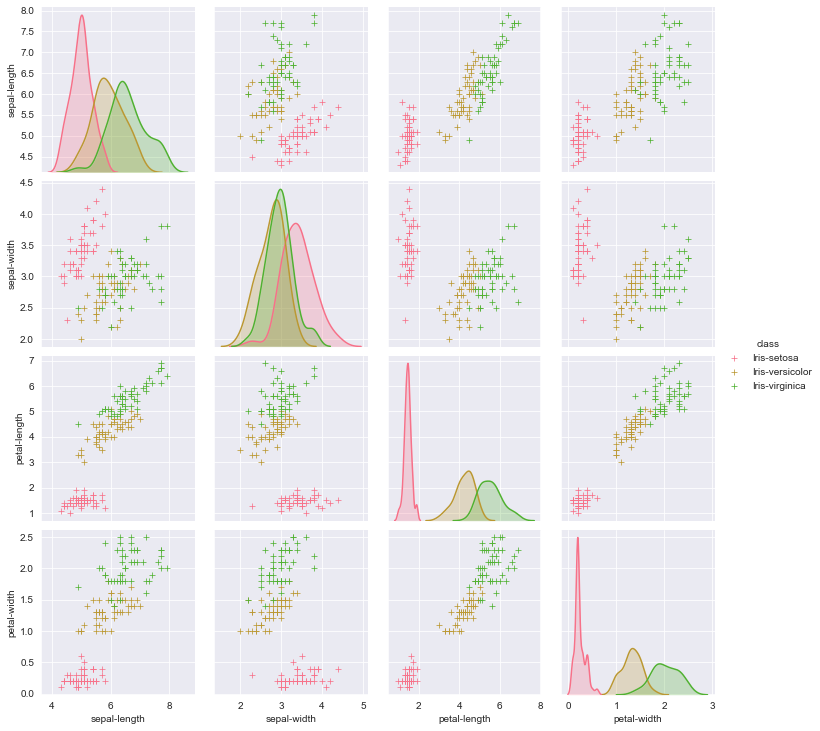

In [7]:
g = sns.pairplot(data, hue='class', markers='+')
plt.show()

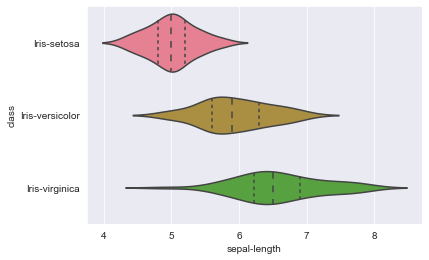

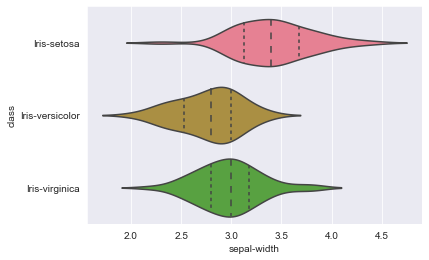

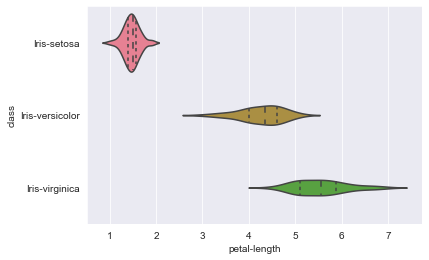

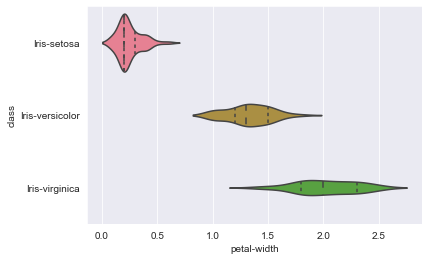

In [8]:
g = sns.violinplot(y='class', x='sepal-length', data=data, inner ='quartile')

plt.show()

g = sns.violinplot(y='class', x='sepal-width', data=data, inner='quartile')

plt.show()

g = sns.violinplot(y='class', x='petal-length', data=data, inner='quartile')

plt.show()

g = sns.violinplot(y='class', x='petal-width', data=data, inner='quartile')

plt.show()

**Modellering**

In [9]:
X = data.drop(['class'], axis=1)
y = data['class']

print(X.shape)

print(y.shape)

(150, 4)
(150,)


**Træner og teste det samme datasæt**

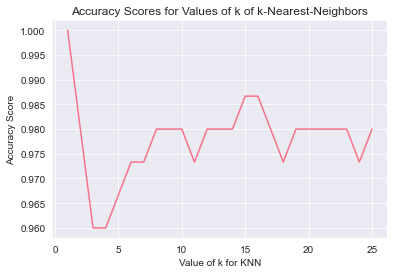

In [10]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [11]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


**Opdeler datasættet til formål af træning**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


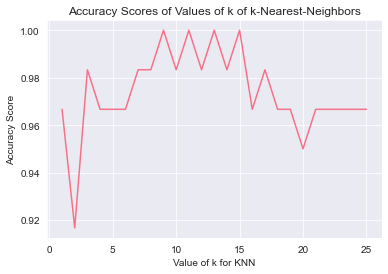

In [13]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Values of k of k-Nearest-Neighbors')
plt.show()

Som bevist ovenstående, forbedres nøjagtigheden ved at opdele datasættet.

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


Vælger KNN til at modellere forudsigelsen af klasserne for Iris med k = 15

In [20]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

#'sepal-length', 'sepal-width', 'petal-length', 'petal-width'
knn.predict([[4,4, 4, 4]])

array(['Iris-virginica'], dtype=object)